# Avaliacão Módulo II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Faca um programa que:  
## 1) Carregue os dados de um csv remoto, ex. csv do github, csv de uma base aberta qualquer ou API.  

In [2]:
# Fonte https://github.com/dadosgovbr/catalogos-dados-brasil/blob/master/dados/catalogos.csv
df = pd.read_csv('https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv', sep=';')


### Exploração

In [3]:
df.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [4]:
# Verificando os dados
df[df['nome_munic']=='Pirassununga']

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
439,Pirassununga,3539301,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
1084,Pirassununga,3539301,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
1729,Pirassununga,3539301,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
2374,Pirassununga,3539301,28,2,2020-02-28,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
3019,Pirassununga,3539301,29,2,2020-02-29,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412594,Pirassununga,3539301,25,11,2021-11-25,9126,1,"1,23816242911025e+04","0,714285714285714",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",47
413239,Pirassununga,3539301,26,11,2021-11-26,9126,0,"1,23816242911025e+04","0,714285714285714",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",47
413884,Pirassununga,3539301,27,11,2021-11-27,9126,0,"1,23816242911025e+04","0,571428571428571",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",47
414529,Pirassununga,3539301,28,11,2021-11-28,9126,0,"1,23816242911025e+04","0,428571428571429",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",48


## 2) Crie uma api que filtre esses dados e (depois do item 4) retorne o json dos dados filtrados.  

In [7]:
%%writefile api_covid.py
from flask import Flask, request
from flask_restful import Resource, Api
import pandas as pd

app = Flask(__name__)
api = Api(app)

df = pd.read_csv('https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv', sep=";")

class Covid(Resource):
    def get(self, cidade):
        procura = df['nome_munic'] == cidade
        retorno = df[procura]
        return retorno.to_json()


api.add_resource(Covid, '/covid/<string:cidade>')

if __name__ == '__main__':
    app.run(debug=True)

Overwriting api_covid.py


In [ ]:
#!python api_covid.py

## 3) A partir dos dados filtrados você deve escolher uma variável quantitativa para agregar com um groupby e criar um csv e um json resposta, ambos devem ser persistidos.  

In [9]:
import requests
import json

cidade = 'Pirassununga'
retornoAPI = requests.get('http://127.0.0.1:5000/covid/'+cidade).json()

In [10]:
dfFiltrado = pd.DataFrame(json.loads(retornoAPI))

In [11]:
dfFiltrado

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
439,Pirassununga,3539301,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
1084,Pirassununga,3539301,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
1729,Pirassununga,3539301,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
2374,Pirassununga,3539301,28,2,2020-02-28,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
3019,Pirassununga,3539301,29,2,2020-02-29,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,73706,13461,72712,0,8.0,"-21,9960","-47,4257",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412594,Pirassununga,3539301,25,11,2021-11-25,9126,1,"1,23816242911025e+04","0,714285714285714",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",47
413239,Pirassununga,3539301,26,11,2021-11-26,9126,0,"1,23816242911025e+04","0,714285714285714",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",47
413884,Pirassununga,3539301,27,11,2021-11-27,9126,0,"1,23816242911025e+04","0,571428571428571",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",47
414529,Pirassununga,3539301,28,11,2021-11-28,9126,0,"1,23816242911025e+04","0,428571428571429",259,...,Piracicaba,11,73706,13461,72712,>5000,1.0,"-21,9960","-47,4257",48


## 4) A partir dos dados filtrados você deve escolher um gráfico para fazer como por exemplo fizemos as gorgetas dadas por sexo ou dia da semana. Crie uma figura png ou jpeg resposta.  

In [12]:
dfFiltrado['ano'] = pd.DatetimeIndex(dfFiltrado['datahora']).year

# Totalização por Semana
dfCasosPorCidadeAggPorSemana = dfFiltrado.groupby(by=['ano', 'semana_epidem'])[['casos_novos', 'obitos_novos']].sum().reset_index()
dfCasosPorCidadeAggPorSemana["ano_semana"] = dfCasosPorCidadeAggPorSemana["ano"].astype(str) +'-'+ dfCasosPorCidadeAggPorSemana["semana_epidem"].astype(str).str.zfill(2)

# Totalização por Mês
dfCasosPorCidadeAggPorMes  = dfFiltrado.groupby(by=['ano', 'mes'])[['casos_novos', 'obitos_novos']].sum().reset_index()
dfCasosPorCidadeAggPorMes["ano_mes"] = dfCasosPorCidadeAggPorMes["ano"].astype(str) +'-'+ dfCasosPorCidadeAggPorMes["mes"].astype(str).str.zfill(2)

In [13]:
dfCasosPorCidadeAggPorSemana.head(5)

,ano,semana_epidem,casos_novos,obitos_novos,ano_semana
0,2020,9,0,0,2020-09
1,2020,10,0,0,2020-10
2,2020,11,0,0,2020-11
3,2020,12,0,0,2020-12
4,2020,13,0,0,2020-13


In [14]:
dfCasosPorCidadeAggPorMes.head(5)

,ano,mes,casos_novos,obitos_novos,ano_mes
0,2020,2,0,0,2020-02
1,2020,3,0,0,2020-03
2,2020,4,11,0,2020-04
3,2020,5,93,1,2020-05
4,2020,6,143,1,2020-06


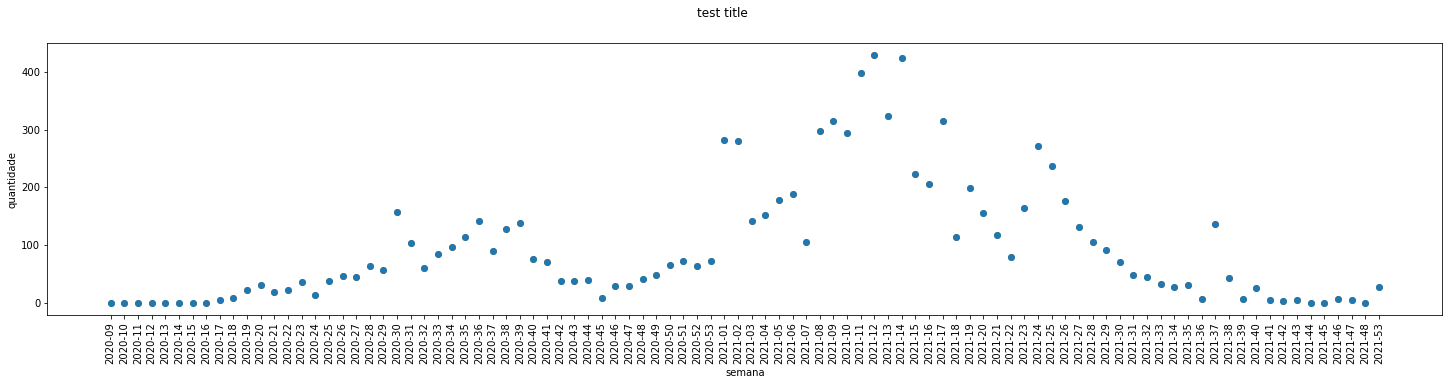

In [15]:
x = dfCasosPorCidadeAggPorSemana['ano_semana']
y = dfCasosPorCidadeAggPorSemana['casos_novos']


figura = plt.figure(figsize=(25, 5))
plt.scatter(x, y, color='orange')
plt.scatter(x, y)
figura.suptitle('test title')
plt.xlabel('semana')
plt.ylabel('quantidade')
plt.xticks(rotation=90)
plt.show()
figura.savefig('CasosPorSemana.jpg')

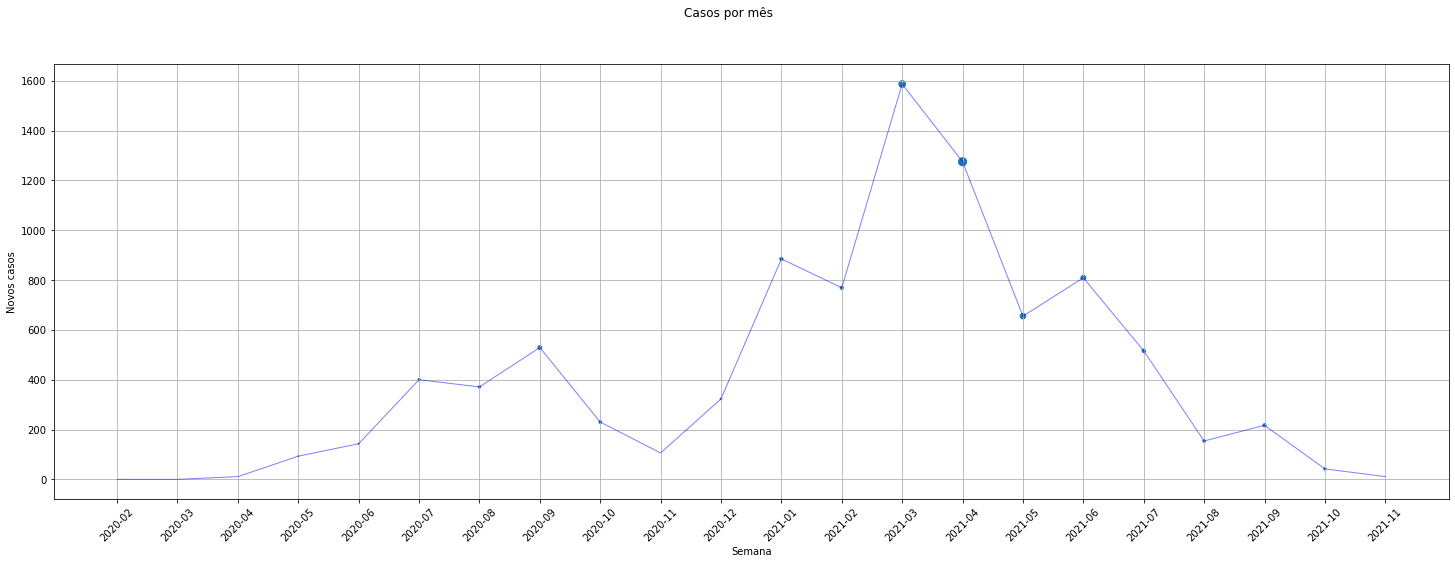

In [16]:
x = dfCasosPorCidadeAggPorMes['ano_mes']
y = dfCasosPorCidadeAggPorMes['casos_novos']
s = dfCasosPorCidadeAggPorMes['obitos_novos']


figura = plt.figure(figsize=(25, 8))
plt.plot(x, y, color='b', alpha=0.5,  linewidth=1)
plt.scatter(x, y, s=s, marker="o")
#plt.scatter(x, y)
figura.suptitle('Casos por mês')
plt.xlabel('Semana')
plt.ylabel('Novos casos')
plt.xticks(rotation=45)
#plt.legend()
plt.grid(True)
plt.show()
figura.savefig('CasosPorMes.jpg')

In [17]:
# Maiores cidades da Regional - Testando um gráfico fora do retorno da API, utilizando o resultado da API como entrada
nomedrs = dfFiltrado[dfFiltrado['nome_munic']==cidade]['nome_drs'].unique()

In [18]:
nomedrs[0]

'Piracicaba'

In [19]:
# Buscando dado no DF inteiro
dfRegional = df[df['nome_drs']==nomedrs[0]]

In [20]:
dfRegional.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
6,Águas de São Pedro,3500600,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,3122,764,361,0,8.0,"-22,5977","-47,8734",9
22,Analândia,3502002,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,4850,813,32595,0,8.0,"-22,1289","-47,6619",9
37,Araras,3503307,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,131057,21594,64483,0,8.0,"-22,3572","-47,3842",9
119,Capivari,3510401,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,54231,7404,32288,0,8.0,"-22,9951","-47,5071",9
132,Charqueada,3511706,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,16933,2399,17585,0,8.0,"-22,5096","-47,7755",9


In [21]:
dfCasosPorCidade = dfRegional.groupby(by=['nome_munic']).agg(casos_totais=('casos_novos', 'sum'), 
                                                             obitos_totais=('obitos_novos', 'sum'),
                                                             pop=('pop', 'mean')).reset_index()

In [22]:
dfCasosPorCidade

,nome_munic,casos_totais,obitos_totais,pop
0,Analândia,387,5,4850
1,Araras,18517,401,131057
2,Capivari,5881,112,54231
3,Charqueada,1584,45,16933
4,Conchal,2916,84,27284
5,Cordeirópolis,5921,102,24356
6,Corumbataí,415,7,3962
7,Elias Fausto,1526,36,17346
8,Engenheiro Coelho,2707,57,20535
9,Ipeúna,767,21,7571


In [23]:
dfCasosPorCidade = dfCasosPorCidade.nlargest(10, ['pop']).reset_index()

In [24]:
x = dfCasosPorCidade['casos_totais']
y = dfCasosPorCidade['obitos_totais']
s = dfCasosPorCidade['pop']/1000

annotations = dfCasosPorCidade['nome_munic']

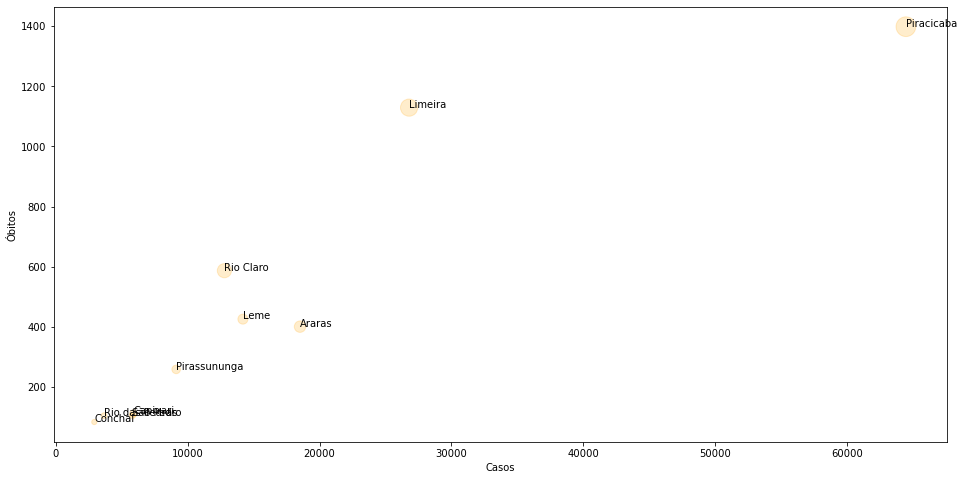

In [25]:
figura = plt.figure(figsize=(16, 8))

plt.scatter(x, y, color='orange', s=s, alpha=0.2)

plt.xlabel('Casos')
plt.ylabel('Óbitos')

for i, label in enumerate(annotations):
    plt.text(x[i], y[i], label)
    
plt.show()

figura.savefig('MaioresCidadesRegional.jpg')